In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/My Drive/Retina_Diseases_Detection

/gdrive/My Drive/Retina_Diseases_Detection


In [ ]:
ls

DRIVE/  models/


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
for dirname, _, filenames in os.walk('/gdrive/My Drive/Retina_Diseases_Detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/32_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/27_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/21_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/22_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/33_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/30_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/34_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/26_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/24_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/23_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/29_manual1.gif
/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training/1st_manual/25_manu

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

In [ ]:
path = Path('/gdrive/My Drive/Retina_Diseases_Detection/DRIVE')
path_training = Path('/gdrive/My Drive/Retina_Diseases_Detection/DRIVE/training')

In [ ]:
images = get_image_files(path_training/'images')

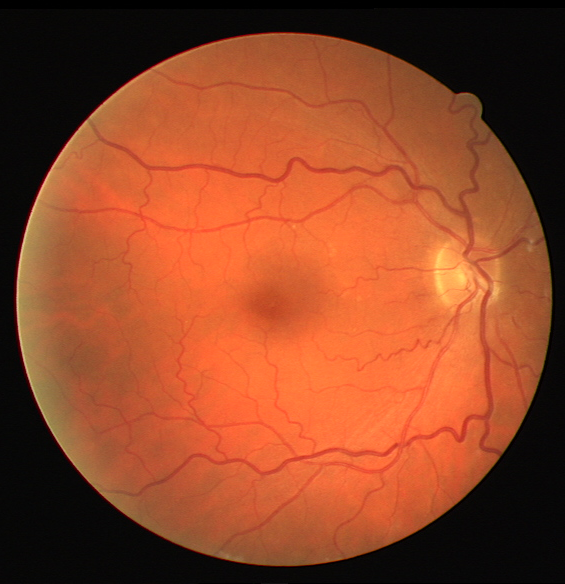

In [ ]:
img = PILImage.create(images[0])
img

In [ ]:
codes = ['0','1']
codes

['0', '1']

In [ ]:
def label_func(fn):
    return path_training/'1st_manual'/f"{fn.stem.split('_')[0]}_manual1.gif"

In [ ]:
tfms = [IntToFloatTensor(div_mask=255),Resize(224),Zoom(max_zoom=2.1,p=0.5),Normalize.from_stats(*imagenet_stats)]
db = DataBlock(blocks=(ImageBlock(),MaskBlock()),
               batch_tfms=[IntToFloatTensor(div_mask=255),Resize(224),Zoom(max_zoom=2.1,p=0.5),Normalize.from_stats(*imagenet_stats)],
               get_items=get_image_files,
               get_y=label_func)
dls = db.dataloaders(path_training/'images',bs = 4)

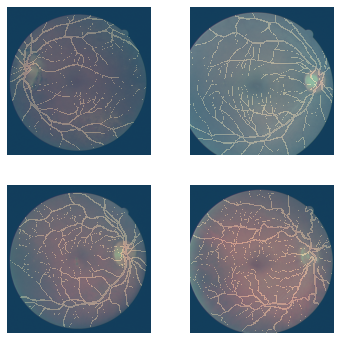

In [ ]:
dls.show_batch(max_n=6)

ResNet 34

In [ ]:
learn = unet_learner(dls,resnet34,metrics=Dice(),n_out=2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,dice,time
0,1.357820,6.452382,0.000000,04:37


epoch,train_loss,valid_loss,dice,time
0,1.494288,0.522988,0.009797,04:52
1,0.923468,0.324050,0.000000,04:45
2,0.710638,0.321357,0.000000,04:47
3,0.593494,0.298010,0.000000,04:49
4,0.508731,0.250037,0.147076,04:48
5,0.452206,0.191977,0.285534,04:47
6,0.403867,0.166028,0.620270,04:48
7,0.364583,0.155794,0.671071,04:48
8,0.331555,0.147222,0.673030,04:48
9,0.304797,0.133858,0.733569,04:49


SuggestedLRs(lr_min=1.584893179824576e-05, lr_steep=1.9054607491852948e-06)

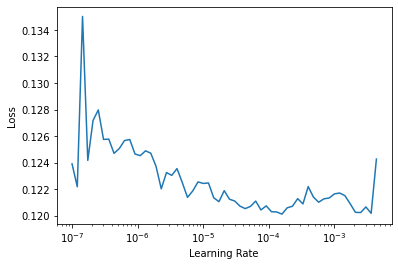

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max = 1e-5)

epoch,train_loss,valid_loss,dice,time
0,0.114569,0.120318,0.755128,04:49
1,0.118406,0.120175,0.755815,04:50
2,0.124640,0.120029,0.757252,04:51
3,0.122189,0.120172,0.756200,04:50


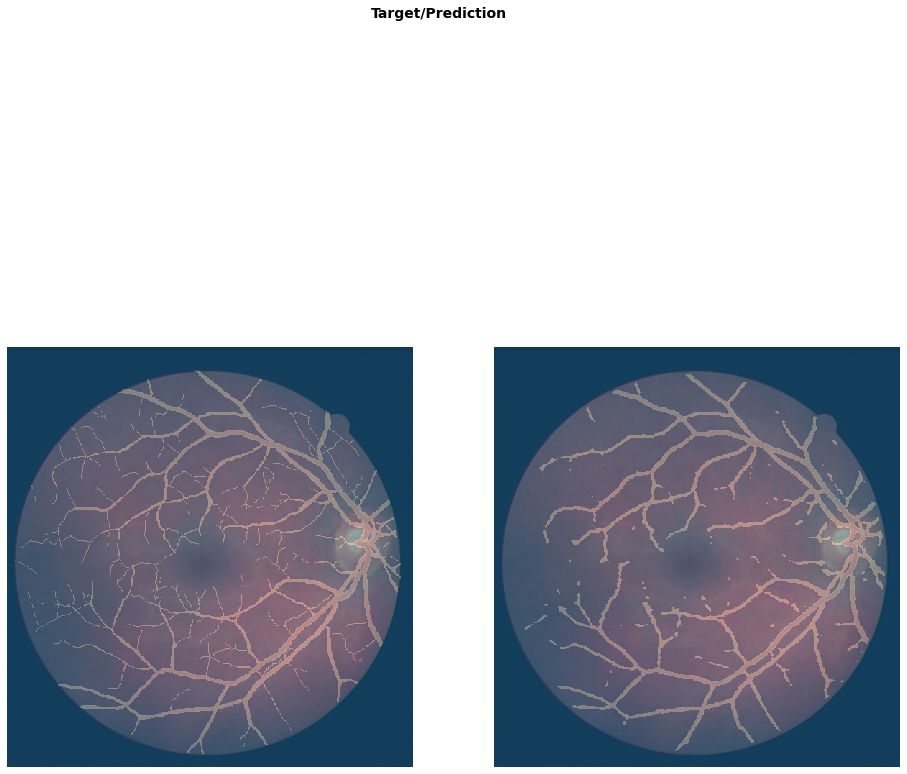

In [ ]:
learn.show_results(max_n=2, figsize=(16,16))

XResnet

In [ ]:
learn = unet_learner(dls,xresnet34,metrics=Dice(),n_out=2)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,dice,time
0,0.635183,7.226183,0.000000,04:41


epoch,train_loss,valid_loss,dice,time
0,1.514700,0.354678,0.000748,06:24
1,0.913924,0.271093,0.000000,04:56
2,0.668293,0.218015,0.334127,04:54
3,0.541996,0.179888,0.656155,04:53
4,0.463628,0.148563,0.662367,04:54
5,0.400958,0.142298,0.668494,04:55
6,0.355452,0.156398,0.580701,04:53
7,0.322711,0.160617,0.569873,04:54


SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=9.12010818865383e-07)

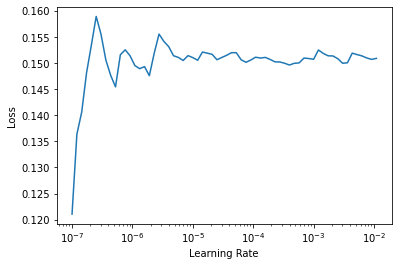

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max = 3e-4)

epoch,train_loss,valid_loss,dice,time
0,0.150439,0.142336,0.670461,04:52
1,0.147676,0.135587,0.706777,04:52
2,0.141958,0.154768,0.633595,04:54
3,0.138533,0.150361,0.647483,04:55


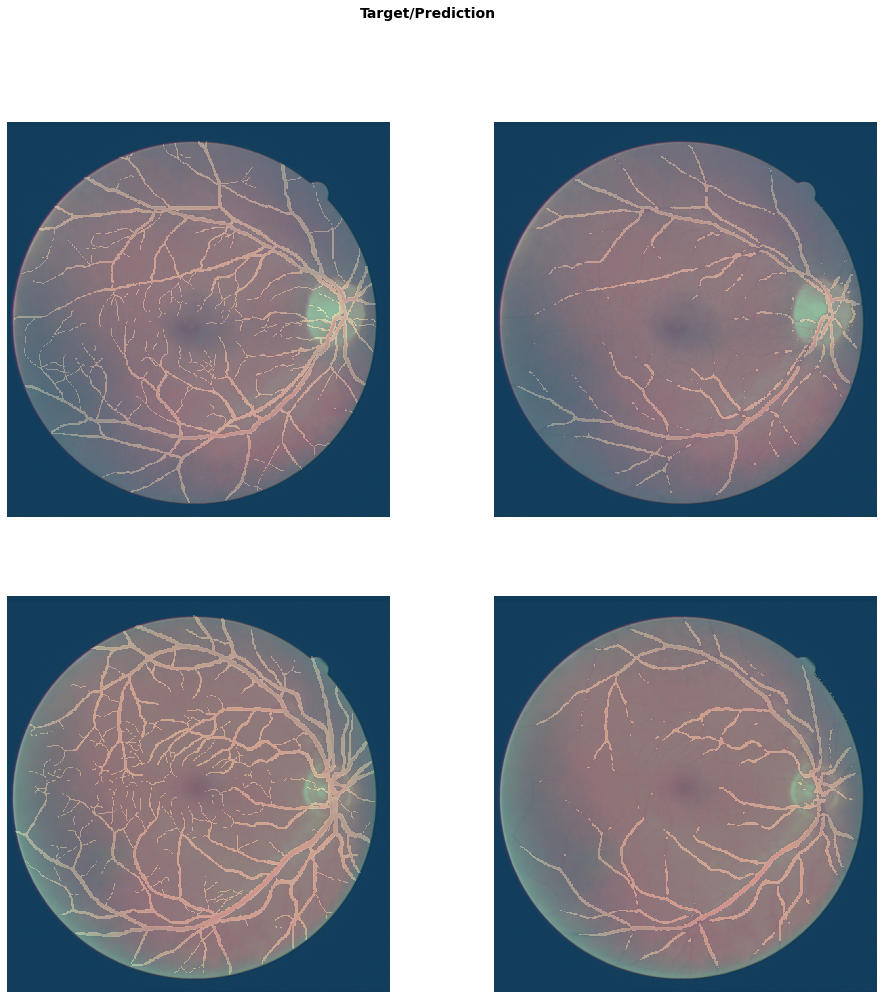

In [ ]:
learn.show_results(max_n=4, figsize=(16,16))